<a href="https://colab.research.google.com/github/Saubhagyah5331/Evalution_Feature_Eng/blob/master/project_gemini_api_iterative_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import userdata
secret_value_0=userdata.get('Gemini_My_Tok_2')

In [ ]:
size = {
     "room": {
        "coordinates": {"x1": 1.0, "y1": 1.0, "x2": 5.5, "y2": 4.5}
    },
    "object": [
        {
            "bed": {
                "types": {
                    "Single": {
                        "width": 2.00,
                        "height": 0.90,
                        "clearance": 0.2
                    },
                    "Queen": {
                        "width": 2.00,
                        "height": 1.50,
                        "clearance": 0.3
                    },
                    "Double": {
                        "width": 1.90,
                        "height": 1.35,
                        "clearance": 0.25
                    },
                    "King": {
                        "width": 2.00,
                        "height": 1.80,
                        "clearance": 0.3
                    },
                    "Twin XL": {
                        "width": 2.00,
                        "height": 0.99,
                        "clearance": 0.3
                    }
                }
            },
            "table": {
                "width": 1.20,
                "height": 0.60,
                "clearance": 0.2
            },
            "wardrobe": {
                "width": 1.80,
                "height": 0.60,
                "clearance": 0.2
            },
            "door": {
                "coordinates": {"x1": 1.00, "y1": 1.00, "x2": 1.7, "y2": 1.10},
                "clearance": {"x1": 1.00, "y1": 1.00, "x2": 1.7, "y2": 1.7}
            },
            "window": {
                "coordinates": {"x1": 5.40, "y1": 2.50, "x2": 5.5, "y2": 3.5}
            }
        }
    ]
}


In [ ]:
def furni_dim(bed_type, bed_dims):
  furni_dim = f"""
  All dimensions are in **meters** (Width × Height), and clearance means the empty space required around the object.

  ---

  ## Furniture Dimensions and Clearance
  Room: {size['room']}
  Bed:
      -Types of Bed:
        - {bed_type}: {bed_dims}
  Table: {size['object'][0]['table']}
  Wardrobe: {size['object'][0]['wardrobe']}
  Door: {size['object'][0]['door']}
  Window: {size['object'][0]['window']}
  """
  return furni_dim

In [ ]:
fixed_ele = f"""
## 1. Fixed Elements in the Room:

- **Door**:

- **Window**:

- **Placement Rules**:
  - No object may **intersect or overlap** with the door or its clearance zone.
  - The **window must never be blocked** by any furniture.
  - The **table** may be placed in front of the window **if clearance is maintained**.
  - The **bed must not be placed in front of the window** under any condition.
"""


In [ ]:
def bed_plac(bed_type, bed_dims):
  bed_plac = f"""
  ## 2. Bed Placement Guidelines:

  **Choose the most optimal bed type and orientation** that fits within the room bounds, considering clearances and leaving enough space for the wardrobe and table.

  ### Bed Type and Size:
  Select from the following bed types, and calculate dimensions accordingly:

  - **{bed_type}**:
    - **Width**: {bed_dims['width']}
    - **Height**: {bed_dims['height']}

  The bed must fits within the room **without compromising space for other furniture** like the wardrobe and table.

  ---

  ### Orientation Options:

  - Horizontal: Width = longer side, Height = shorter side
    - Headboard lies on the left or right side of the wall.

  - Vertical: Width = shorter side, Height = longer side
    - Headboard lies on the top or bottom side of the wall.

  The headboard is always on the shorter side of the bed.

  ---

  ### Room Limits:

  - Bed must lie entirely within the room: from (1, 1) to (room_height, room_width)
  - (x, y) represents the bottom-left corner of the bed.

  ---

  ### Wall & Clearance Rules:

  - Only the headboard side should touch a wall — all other sides should maintain distance from walls.
  - Clearance Required: `{bed_dims['clearance']}` meters on all open sides.
  - Headboard side touching wall can have 0 clearance.
  - The long sides (sleeping sides) must remain accessible.

  ---

  ### Restrictions:

  - Do Not Overlap:
    - Bed or its clearance must not intersect with:
      - Door or its clearance
      - Window
      - Table or its clearance
      - Wardrobe or its clearance

  - Avoid:
    - **Touching more than one side of the bed to touch the wall**
    - Placing bed in front of the window
    - Blocking the path from the door
    - Pushing the longest side of the bed against a wall

  ---

  ### Placement Strategy:

  - Ensure there is adequate space left for placing both table and wardrobe without congestion.
  - The **bed and wall must maintain the T-Shape symmetry**.
  - Prioritize layouts where:
    - Only the headboard touches the wall
    - Open space is maximized for movement and access
    - Bed is placed away from the door and wardrobe area
    - Clear walkways are maintained

  ---
  """
  return bed_plac

In [ ]:
table_plac = f"""
## 3. Study Table Placement Constraints:

- **Dimensions**: (table_width) x (table_height) (rotatable)

- **Allowed Orientations**:
  - **Horizontal**: Width = (table_width), Height = (table_height)
  - **Vertical**:   Width = (table_height), Height = (table_width)
  - The table may be placed in **either horizontal or vertical orientation**, based on available space in front of the window.

- **Room Boundary**:
  - The table must be **completely within** the room: from (1, 1) to (room_height, room_width).

- **Clearance Rules**:
  - Maintain a **minimum clearance of (table_clearance) meter on all sides**.
  - Clearance can be **ignored on the side touching a wall**, if applicable.

- **Preferred Placement**:
  - The **table must be placed infront of the window.**
  - The table should be placed in a way that it will cover the least area of the room.
  - Atleast **one side of the table must touch a wall.**
  - Largest side of the table MUST touch the window


- **Collision Rules**:
  - The table (including clearance) must **not intersect or overlap** with:
    - The **door** and its clearance zone
    - The **bed** and its clearance zone
    - The **wardrobe** and its clearance zone

"""


In [ ]:
wardrobe_plac = f"""
## 4. Wardrobe Placement Constraints:

- **Dimensions**: (wardrobe_width) x (wardrobe_height) (rotatable)

- **Allowed Orientations**:
  - Horizontal: Width = (wardrobe_width), Height = (wardrobe_height)
  - Vertical:   Width = (wardrobe_height), Height = (wardrobe_width)

- **Room Boundary**:
  - Must be placed entirely within the room: from (1, 1) to (room_height, room_width)
  - (x, y) indicates the **bottom-left corner** of the wardrobe

- **Clearance Rules**:
  - Maintain **(wardrobe_clearnace) meter** clearance on all sides, except where the wardrobe touches a wall.

- **Overlapping Rules**:
  - The wardrobe and its clearance area must **not overlap** with:
    - The **door** and its clearance area
    - The **window**
    - The **bed** and its clearance area
    - The **table** and its clearance area

- **Placement Strategy**:
  - Prefer placing the **wardrobe in a corner**.
  - Ensure the wardrobe door is not obstructed and can open fully.
"""

In [ ]:
def rules(bed_type, bed_dims):
  rules = f"""
  ### Rules:

  {fixed_ele}
  ---

  {bed_plac(bed_type, bed_dims)}
  ---

  {table_plac}
  ---

  {wardrobe_plac}
  ---

  ### 5. General Spatial Constraints (for all objects):
  - The **size** of the bed should **not be altered based on any condition.** (i.e., the bed should always be of the same size as mentioned in the furniture dimensions).
  - **Objects must not overlap** with **each other or their clearances.**
  - Objects must be **completely within the room boundaries**.
  - **Each furniture should have minimum 0.1 meter clearance from other furniture including its clearance** .

  ---

  """

  return rules

In [ ]:
output_format = """
```json
{
    "room": {
        "coordinates": {"x1": <room_start_x>, "y1": <room_start_y>, "x2": <room_end_x>, "y2": <room_end_y>}
    },
    "placements": [
        {
            "bed": {
                "type": "<bed_type>",
                "coordinates": {"x1": <bed_start_x>, "y1": <bed_start_y>, "x2": <bed_end_x>, "y2": <bed_end_y>},
                "clearance": {"x1": <bed_clear_x1>, "y1": <bed_clear_y1>, "x2": <bed_clear_x2>, "y2": <bed_clear_y2>}
            },
            "table": {
                "coordinates": {"x1": <table_start_x>, "y1": <table_start_y>, "x2": <table_end_x>, "y2": <table_end_y>},
                "clearance": {"x1": <table_clear_x1>, "y1": <table_clear_y1>, "x2": <table_clear_x2>, "y2": <table_clear_y2>}
            },
            "wardrobe": {
                "coordinates": {"x1": <wardrobe_start_x>, "y1": <wardrobe_start_y>, "x2": <wardrobe_end_x>, "y2": <wardrobe_end_y>},
                "clearance": {"x1": <wardrobe_clear_x1>, "y1": <wardrobe_clear_y1>, "x2": <wardrobe_clear_x2>, "y2": <wardrobe_clear_y2>}
            },
            "door": {
                "coordinates": {"x1": <door_start_x>, "y1": <door_start_y>, "x2": <door_end_x>, "y2": <door_end_y>},
                "clearance": {"x1": <door_clear_x1>, "y1": <door_clear_y1>, "x2": <door_clear_x2>, "y2": <door_clear_y2>}
            },
            "window": {
                "coordinates": {"x1": <window_start_x>, "y1": <window_start_y>, "x2": <window_end_x>, "y2": <window_end_y>}
            }
        }
    ]
}
```
"""

In [ ]:
def generate_prompt(bed_type, bed_dims):
    prompt = f"""
You are given a task to place a **bed, study table, wardrobe** inside a room.

---
{furni_dim(bed_type, bed_dims)}
---

# General Output Format Explanation:

# For each placed object (e.g., bed, table, wardrobe, etc.), the output must include the following coordinates:

- **x1, y1** → The bottom-left corner of the object.
- **x2, y2** → The top-right corner of the object.
- The Dimension of the any object should not be vary with the orientation

---

### Room Configuration:
(room_height, room_width)
- The total grid size is (room_height+2) rows x (room_width+2) columns.
- Room size: **(room_height) rows x (room_width) columns**, centered within (room_height+2) rows x (room_width+2) columns grid.
- The room's usable area is bounded from (1,1) to (room_height, room_width).
  - **(1,1)** is the **bottom-left** corner of the room.
  - **((room_height+1), (room_width+1))** is the **top-right** corner.
- The 1-cell padding around this space (from (0,0) to ((room_height+2), (room_width+2)) acts as the **non-usable boundary**.


---

{rules(bed_type, bed_dims)}

---

### Output Format:
- **Return the different placements of the furniture for every bed type**
JSON format:

{output_format}
"""
    return prompt


In [ ]:
bed_types = size["object"][0]["bed"]["types"]
for bed_type, bed_dims in bed_types.items():
  print(bed_type, bed_dims)
  print("succesd")

Single {'width': 2.0, 'height': 0.9, 'clearance': 0.2}
succesd
Queen {'width': 2.0, 'height': 1.5, 'clearance': 0.3}
succesd
Double {'width': 1.9, 'height': 1.35, 'clearance': 0.25}
succesd
King {'width': 2.0, 'height': 1.8, 'clearance': 0.3}
succesd
Twin XL {'width': 2.0, 'height': 0.99, 'clearance': 0.3}
succesd


In [ ]:
# from google import genai
# import json

# client = genai.Client(api_key=secret_value_0)

# bed_types = size["object"][0]["bed"]["types"]
# final_placements = []


# for bed_type, bed_dims in bed_types.items():


#     prompt = generate_prompt(bed_type, bed_dims)

#     response = client.models.generate_content(
#         model="gemini-2.5-pro-exp-03-25",
#         contents=prompt
#     )

#     try:
#         json_string = response.text.split("```json")[1].split("```")[0]
#         layout = json.loads(json_string)

#         final_placements.append(layout)
#         print(f"Success with bed type {bed_type}")
#     except Exception as e:
#         print(f"Error with bed type {bed_type}: {e}")


### **Thread task**

In [ ]:
import threading
import queue
import json
from google import genai

client = genai.Client(api_key=secret_value_0)

bed_types = size["object"][0]["bed"]["types"]
final_placements = []
lock = threading.Lock()  # To safely append to final_placements
task_queue = queue.Queue()


def worker():
    while not task_queue.empty():
        bed_type, bed_dims = task_queue.get()
        try:
            prompt = generate_prompt(bed_type, bed_dims)

            response = client.models.generate_content(
                model="gemini-2.5-pro-exp-03-25",
                contents=prompt
            )

            json_string = response.text.split("```json")[1].split("```")[0]
            layout = json.loads(json_string)

            with lock:
                final_placements.append(layout)

            print(f"✅ Success with bed type {bed_type}")
        except Exception as e:
            print(f"❌ Error with bed type {bed_type}: {e}")
        finally:
            task_queue.task_done()


# Fill the queue
for bed_type, bed_dims in bed_types.items():
    task_queue.put((bed_type, bed_dims))

# Launch threads
num_threads = min(10, len(bed_types))  # You can tweak this number
threads = []

for _ in range(num_threads):
    t = threading.Thread(target=worker)
    t.start()
    threads.append(t)

# Wait for all tasks to finish
task_queue.join()

print("All tasks completed.")


✅ Success with bed type Queen
✅ Success with bed type Single
✅ Success with bed type Double
✅ Success with bed type Twin XL
✅ Success with bed type King
All tasks completed.


In [ ]:
final_placements

[{'room': {'coordinates': {'x1': 1.0, 'y1': 1.0, 'x2': 5.5, 'y2': 4.5}},
  'placements': [{'bed': {'type': 'Queen',
     'coordinates': {'x1': 1.3, 'y1': 2.5, 'x2': 2.8, 'y2': 4.5},
     'clearance': {'x1': 1.0, 'y1': 2.2, 'x2': 3.1, 'y2': 4.5}},
    'table': {'coordinates': {'x1': 4.9, 'y1': 2.4, 'x2': 5.5, 'y2': 3.6},
     'clearance': {'x1': 4.7, 'y1': 2.2, 'x2': 5.5, 'y2': 3.8}},
    'wardrobe': {'coordinates': {'x1': 3.7, 'y1': 1.0, 'x2': 5.5, 'y2': 1.6},
     'clearance': {'x1': 3.5, 'y1': 1.0, 'x2': 5.5, 'y2': 1.8}},
    'door': {'coordinates': {'x1': 1.0, 'y1': 1.0, 'x2': 1.7, 'y2': 1.1},
     'clearance': {'x1': 1.0, 'y1': 1.0, 'x2': 1.7, 'y2': 1.7}},
    'window': {'coordinates': {'x1': 5.4, 'y1': 2.5, 'x2': 5.5, 'y2': 3.5}}}]},
 {'room': {'coordinates': {'x1': 1.0, 'y1': 1.0, 'x2': 5.5, 'y2': 4.5}},
  'placements': [{'bed': {'type': 'Single',
     'coordinates': {'x1': 1.0, 'y1': 3.6, 'x2': 3.0, 'y2': 4.5},
     'clearance': {'x1': 1.0, 'y1': 3.4, 'x2': 3.2, 'y2': 4.5}},
   

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def complete_plot_room(output_list):
    fig, axes = plt.subplots(1, len(output_list), figsize=(6 * len(output_list), 6))

    if len(output_list) == 1:
        axes = [axes]  # Ensure it's iterable

    for idx, ax in enumerate(axes):
        output = output_list[idx]
        room = output.get("room", {}).get("coordinates", {"x1": 0.0, "y1": 0.0, "x2": 5.0, "y2": 4.0})
        placement = output.get("placements", [{}])[0]

        x1, y1, x2, y2 = room["x1"], room["y1"], room["x2"], room["y2"]
        room_width = x2 - x1
        room_height = y2 - y1

        ax.set_xticks(np.arange(0, x2 + 1, 0.5))
        ax.set_yticks(np.arange(0, y2 + 1, 0.5))
        ax.grid(lw=0.5, linestyle='--', color='gray')
        ax.set_xlim(0, x2 + 1)
        ax.set_ylim(0, y2 + 1)
        ax.set_aspect('equal')
        ax.set_title(f"Layout {idx+1}")
        ax.set_xlabel("Width (m)")
        ax.set_ylabel("Height (m)")

        # Room boundary
        ax.add_patch(plt.Rectangle((x1, y1), room_width, room_height,
                                   fill=True, facecolor="white", alpha=0.6, lw=1.5, ec="black", zorder=2))

        def draw_rect(ax, coords, color, label, z=4):
            x1, y1, x2, y2 = coords["x1"], coords["y1"], coords["x2"], coords["y2"]
            rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                 fc=color, ec='black', lw=1, alpha=1, label=label, zorder=z)
            ax.add_patch(rect)

        def draw_clearance(ax, coords, color, label, z=3):
            x1, y1, x2, y2 = coords["x1"], coords["y1"], coords["x2"], coords["y2"]
            clear = plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                  fill=True, facecolor=color, alpha=0.2,
                                  linestyle='--', edgecolor=color, lw=1, label=label, zorder=z)
            ax.add_patch(clear)

        for furniture, details in placement.items():
            color_map = {
                "bed": "saddlebrown",
                "table": "royalblue",
                "wardrobe": "darkgreen",
                "door": "gray",
                "window": "skyblue"
            }

            color = color_map.get(furniture, "purple")

            # Draw main rectangle
            if "coordinates" in details:
                draw_rect(ax, details["coordinates"], color, furniture.title())

            # Draw clearance if available
            if "clearance" in details:
                draw_clearance(ax, details["clearance"], color, f"{furniture.title()} Clearance")

            # Add label for bed type
            if furniture == "bed":
                bed_type = details.get("type", "Bed")
                coords = details["coordinates"]
                cx = (coords["x1"] + coords["x2"]) / 2
                cy = (coords["y1"] + coords["y2"]) / 2
                ax.annotate(bed_type, (cx, cy), color='white', fontsize=10,
                            ha='center', va='center', weight='bold', zorder=5)

    plt.tight_layout()
    plt.show()


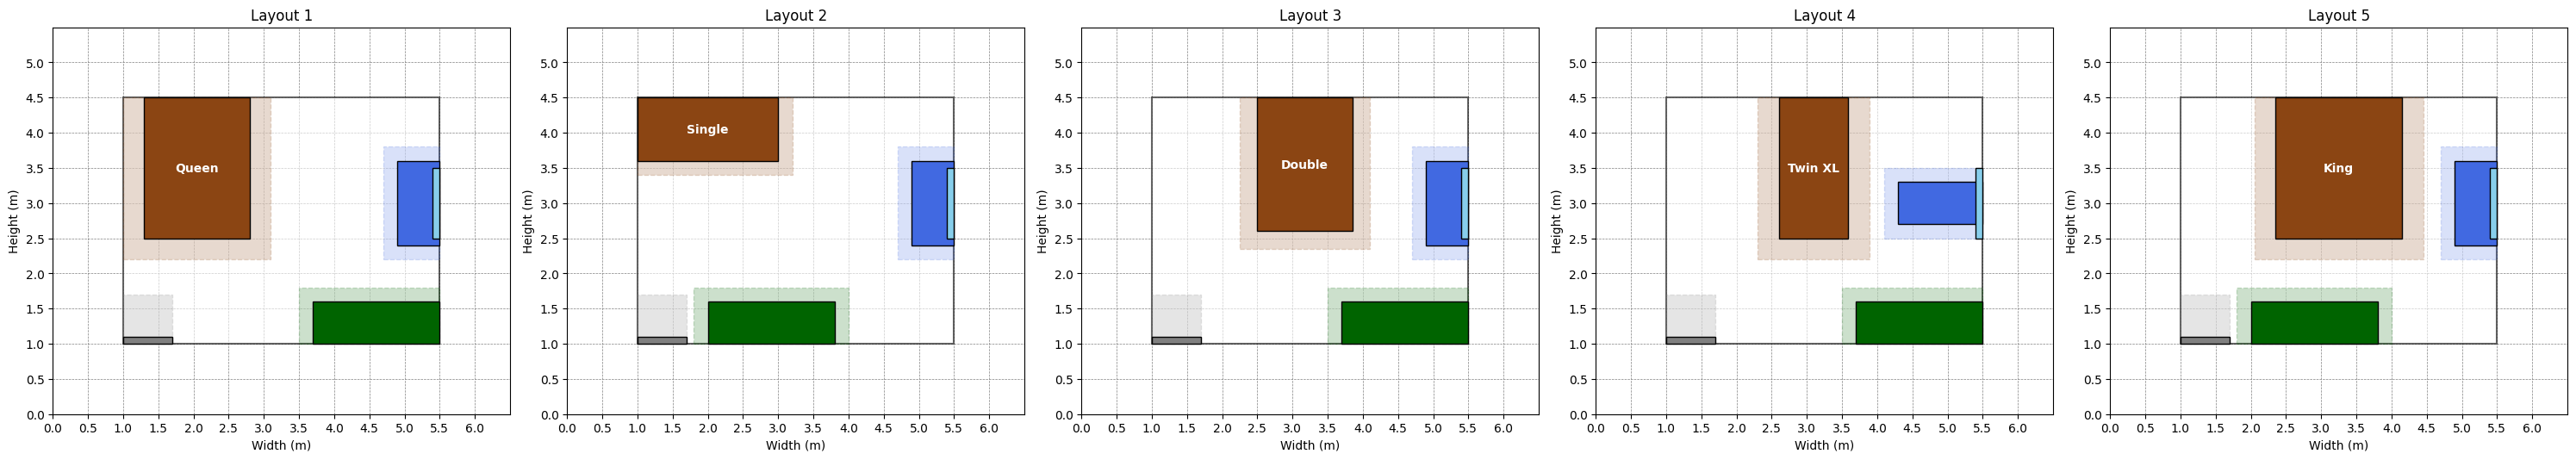

In [ ]:
complete_plot_room(final_placements)